# Feature engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
# Read the datafile
df = pd.read_csv('EDA_cleaned_CHD.csv')
df.head()

gender  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0       1   39        4.0              0         0.0     0.0                0   
1       0   46        2.0              0         0.0     0.0                0   
2       1   48        1.0              1        20.0     0.0                0   
3       0   61        3.0              1        30.0     0.0                0   
4       0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD age_group  
0           0     30-39  
1           0     40-49  
2           0     40-49  
3           1     60-70  
4           0     40-49

In [3]:
df.shape

(3658, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3658 entries, 0 to 3657
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           3658 non-null   int64  
 1   age              3658 non-null   int64  
 2   education        3658 non-null   float64
 3   currentSmoker    3658 non-null   int64  
 4   cigsPerDay       3658 non-null   float64
 5   BPMeds           3658 non-null   float64
 6   prevalentStroke  3658 non-null   int64  
 7   prevalentHyp     3658 non-null   int64  
 8   diabetes         3658 non-null   int64  
 9   totChol          3658 non-null   float64
 10  sysBP            3658 non-null   float64
 11  diaBP            3658 non-null   float64
 12  BMI              3658 non-null   float64
 13  heartRate        3658 non-null   float64
 14  glucose          3658 non-null   float64
 15  TenYearCHD       3658 non-null   int64  
 16  age_group        3658 non-null   object 
dtypes: float64(9),

In [5]:
df.describe().T

count        mean        std     min     25%     50%  \
gender           3658.0    0.443685   0.496886    0.00    0.00    0.00   
age              3658.0   49.551941   8.562029   32.00   42.00   49.00   
education        3658.0    1.980317   1.022656    1.00    1.00    2.00   
currentSmoker    3658.0    0.489065   0.499949    0.00    0.00    0.00   
cigsPerDay       3658.0    9.025424  11.921590    0.00    0.00    0.00   
BPMeds           3658.0    0.030344   0.171557    0.00    0.00    0.00   
prevalentStroke  3658.0    0.005741   0.075561    0.00    0.00    0.00   
prevalentHyp     3658.0    0.311646   0.463229    0.00    0.00    0.00   
diabetes         3658.0    0.027064   0.162292    0.00    0.00    0.00   
totChol          3658.0  236.847731  44.097681  113.00  206.00  234.00   
sysBP            3658.0  132.370558  22.086866   83.50  117.00  128.00   
diaBP            3658.0   82.917031  11.974258   48.00   75.00   82.00   
BMI              3658.0   25.782802   4.065601   15.54   23.08   25.38   
heartRate        3658.0   75.730727  11.981525   44.00   68.00   75.00   
glucose          3658.0   81.852925  23.904164   40.00   71.00   78.00   
TenYearCHD       3658.0    0.152269   0.359331    0.00    0.00    0.00   

                      75%    max  
gender             1.0000    1.0  
age               56.0000   70.0  
education          3.0000    4.0  
currentSmoker      1.0000    1.0  
cigsPerDay        20.0000   70.0  
BPMeds             0.0000    1.0  
prevalentStroke    0.0000    1.0  
prevalentHyp       1.0000    1.0  
diabetes           0.0000    1.0  
totChol          263.0000  600.0  
sysBP            143.8750  295.0  
diaBP             90.0000  142.5  
BMI               28.0375   56.8  
heartRate         82.0000  143.0  
glucose           87.0000  394.0  
TenYearCHD         0.0000    1.0

In [6]:
#convert numerical data type 'age' into catergorical data by calculating age group
df['age_group'] = pd.cut(df['age'], bins=[1, 30, 40, 50, 60, np.inf], 
                          labels=[1,2,3,4,5])
df.drop(['age'], axis=1, inplace=True)
df.head()

gender  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0       1        4.0              0         0.0     0.0                0   
1       0        2.0              0         0.0     0.0                0   
2       1        1.0              1        20.0     0.0                0   
3       0        3.0              1        30.0     0.0                0   
4       0        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD age_group  
0           0         2  
1           0         3  
2           0         3  
3           1         5  
4           0         3

In [7]:
cat_columns = ['gender', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'age_group']

In [8]:
df[cat_columns] = df[cat_columns].astype(str)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3658 entries, 0 to 3657
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           3658 non-null   object 
 1   education        3658 non-null   object 
 2   currentSmoker    3658 non-null   object 
 3   cigsPerDay       3658 non-null   float64
 4   BPMeds           3658 non-null   object 
 5   prevalentStroke  3658 non-null   object 
 6   prevalentHyp     3658 non-null   object 
 7   diabetes         3658 non-null   object 
 8   totChol          3658 non-null   float64
 9   sysBP            3658 non-null   float64
 10  diaBP            3658 non-null   float64
 11  BMI              3658 non-null   float64
 12  heartRate        3658 non-null   float64
 13  glucose          3658 non-null   float64
 14  TenYearCHD       3658 non-null   int64  
 15  age_group        3658 non-null   object 
dtypes: float64(7), int64(1), object(8)
memory usage: 457.4+ KB


In [10]:
X = df.drop(columns='TenYearCHD')
X.head()

gender education currentSmoker  cigsPerDay BPMeds prevalentStroke  \
0      1       4.0             0         0.0    0.0               0   
1      0       2.0             0         0.0    0.0               0   
2      1       1.0             1        20.0    0.0               0   
3      0       3.0             1        30.0    0.0               0   
4      0       3.0             1        23.0    0.0               0   

  prevalentHyp diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0            0        0    195.0  106.0   70.0  26.97       80.0     77.0   
1            0        0    250.0  121.0   81.0  28.73       95.0     76.0   
2            0        0    245.0  127.5   80.0  25.34       75.0     70.0   
3            1        0    225.0  150.0   95.0  28.58       65.0    103.0   
4            0        0    285.0  130.0   84.0  23.10       85.0     85.0   

  age_group  
0         2  
1         3  
2         3  
3         5  
4         3

In [11]:
y=df['TenYearCHD']
y.head()

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

## Identify the features that contribute most to coronary heart disease

In [12]:
# Identify the features that contribute the most to heart Disease using electKBest
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

#Generate dataframe of features and their corresponding feature score
featureScores = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(fit.scores_)],axis=1)
featureScores.columns = ['Features','Scores_of_features']
print(featureScores.sort_values("Scores_of_features", ascending=False))


           Features  Scores_of_features
9             sysBP          669.136021
13          glucose          379.914235
8           totChol          250.490205
3        cigsPerDay          155.798307
10            diaBP          142.521814
6      prevalentHyp           82.845455
14        age_group           44.319608
7          diabetes           31.067621
4            BPMeds           28.191569
0            gender           17.107751
11              BMI           15.785436
5   prevalentStroke            8.507833
1         education            7.733287
12        heartRate            2.917287
2     currentSmoker            0.686474


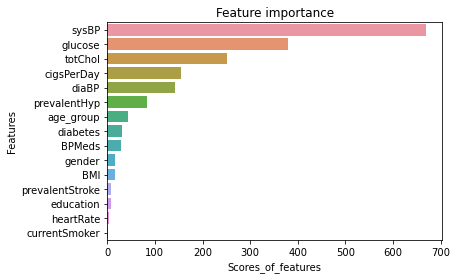

In [13]:
#Bar plot of feature importance
sorted_data = featureScores.sort_values("Scores_of_features", ascending=False)
sns.barplot(x="Scores_of_features", y="Features", data=sorted_data)
plt.title('Feature importance')
plt.show()

## Select the most important features to predict CHD

In [14]:
# select the top 10 most important features
top_10_features = sorted_data["Features"].tolist()[:10]
top_10_features

['sysBP',
 'glucose',
 'totChol',
 'cigsPerDay',
 'diaBP',
 'prevalentHyp',
 'age_group',
 'diabetes',
 'BPMeds',
 'gender']

In [15]:
#generate new dataframe with the top ten features and the target variable
new_feat = top_10_features + ['TenYearCHD']
new_df = df[new_feat]
new_df.head()

sysBP  glucose  totChol  cigsPerDay  diaBP prevalentHyp age_group diabetes  \
0  106.0     77.0    195.0         0.0   70.0            0         2        0   
1  121.0     76.0    250.0         0.0   81.0            0         3        0   
2  127.5     70.0    245.0        20.0   80.0            0         3        0   
3  150.0    103.0    225.0        30.0   95.0            1         5        0   
4  130.0     85.0    285.0        23.0   84.0            0         3        0   

  BPMeds gender  TenYearCHD  
0    0.0      1           0  
1    0.0      0           0  
2    0.0      1           0  
3    0.0      0           1  
4    0.0      0           0

In [16]:
#save the new dataframe
new_df.to_csv(r"03_FE_CHD_data.csv",  index = False, header=True)